# Sync-ML-Intern Task 4: Sign Language Classification

**Author:** Ahmed Hisham Fathy Hassabou

## Project Overview

In this project, we will be developing a Sign Language Classification model using deep learning techniques. The goal of the project is to recognize and classify different sign language gestures, specifically those from the American Sign Language (ASL). We will train a convolutional neural network (CNN) to perform this task.

## Project Steps

1. Setting the random seeds for reproducibility.
  - In machine learning, it's important to set random seeds to ensure that the results can be reproduced. This step establishes a consistent starting point for the project's random processes, making it easier to compare and replicate results.
2. Loading the datasets, which include images of ASL gestures.
  - This project involves working with datasets that contain images of American Sign Language (ASL) gestures. These datasets are essential for training and testing a machine learning model to recognize and classify these gestures.
  - This dataset can be downloaded from: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
3. Creating a dictionary of labels to represent the classes.
  - In the ASL dataset, each gesture is associated with a specific label. This step creates a dictionary that maps the labels (letters and other symbols) to numerical values, making it easier for the machine learning model to work with the data.
4. Preprocessing the data, including one-hot encoding of labels.
  - Preprocessing involves preparing the data for training a machine learning model. In this step, one-hot encoding is applied to the labels. One-hot encoding converts the labels into a numerical format suitable for machine learning algorithms.
5. Building a CNN model for classification.
  - A CNN (Convolutional Neural Network) is a type of deep learning model specifically designed for image classification tasks. In this step, a CNN model is constructed to learn and recognize patterns in the ASL gesture images.
6. Training the model and monitoring its performance.
  - The model is trained using the labeled ASL gesture images. During training, the model learns to make predictions based on the patterns it identifies in the images. The training process is monitored to assess the model's performance.
7. Visualizing the training and validation loss and accuracy.
  - As the model is trained, it's crucial to monitor its performance. This step involves visualizing the loss and accuracy metrics to assess how well the model is learning from the data.
8. Making predictions with the trained model.
  - Once the model is trained, it can be used to make predictions on new, unseen data. In this case, it will predict the ASL gestures in test images.
9. Displaying test set images with predicted labels.
  - To visually assess the model's performance, test set images are shown alongside their predicted labels. This step helps verify if the model is correctly recognizing ASL gestures.
10. Exporting predictions as a CSV file.
  - The final step involves exporting the model's predictions as a CSV (Comma-Separated Values) file. This allows for easy sharing and analysis of the model's output.

# Setting the random seeds

Setting random seeds for reproducibility.

In [1]:
import numpy as np
import tensorflow as tf
import random as python_random

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

# Loading the datasets

Importing required libraries and mounting to Google Drive.

In [2]:
import cv2
import os
import string
from os.path import join
import matplotlib.pyplot as plt
from PIL import Image
import regex as re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping the file to Colab.

In [3]:
!unzip "/content/drive/My Drive/ASL_Project/dataset.zip" -d "/content/data"

Archive:  /content/drive/My Drive/ASL_Project/dataset.zip
replace /content/data/asl_alphabet_test/asl_alphabet_test/A_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Creating a dictionary of labels so that we can store the golden labels as numerical values.

In [3]:
labels = {k: v for v, k in enumerate(list(string.ascii_uppercase))}
labels["space"] = 26
labels["del"] = 27
labels["nothing"] = 28
print(labels)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26, 'del': 27, 'nothing': 28}


Functions to load the images.

In [4]:
# Function taken from: https://github.com/libvips/pyvips/issues/179
def readImage(f, img_size):
    im = Image.open(f)
    im.draft('RGB', img_size)
    return np.asarray(im)

In [5]:
def load_datasets():

  DEBUG = False
  data_path = "/content/data/"
  X_train = []
  y_train = []
  img_size = 100,100

  if DEBUG: print("Loading X_train, y_train")
  for folder_name in os.listdir(join(data_path,"asl_alphabet_train/asl_alphabet_train")):
    if DEBUG: print(f"— Letter: {folder_name}")
    for count, image_file in enumerate(sorted(os.listdir(join(data_path,"asl_alphabet_train/asl_alphabet_train", folder_name)), key=lambda f: int(re.sub('\D', '', f)))):
      if DEBUG: print(f"—— {count+1}/1000, {image_file}")
      img = readImage(join(data_path,"asl_alphabet_train/asl_alphabet_train", folder_name, image_file), img_size)
      if img is not None:
        X_train.append(img)
        y_train.append(labels[folder_name])

  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_test = []

  if DEBUG: print("\nLoading X_test")
  for image_file in sorted(os.listdir(join(data_path, "asl_alphabet_test/asl_alphabet_test"))):
    if DEBUG: print(f"—— {image_file}")
    img = readImage(join(data_path, "asl_alphabet_test/asl_alphabet_test", image_file), img_size)
    if img is not None:
      X_test.append(img)

  X_test = np.array(X_test)

  if DEBUG: print()
  print("Loaded the images.")

  return X_train, y_train, X_test

Loading the datasets.

In [7]:
X_train, y_train, X_test = load_datasets()

Loaded the images.


Plotting sample images.

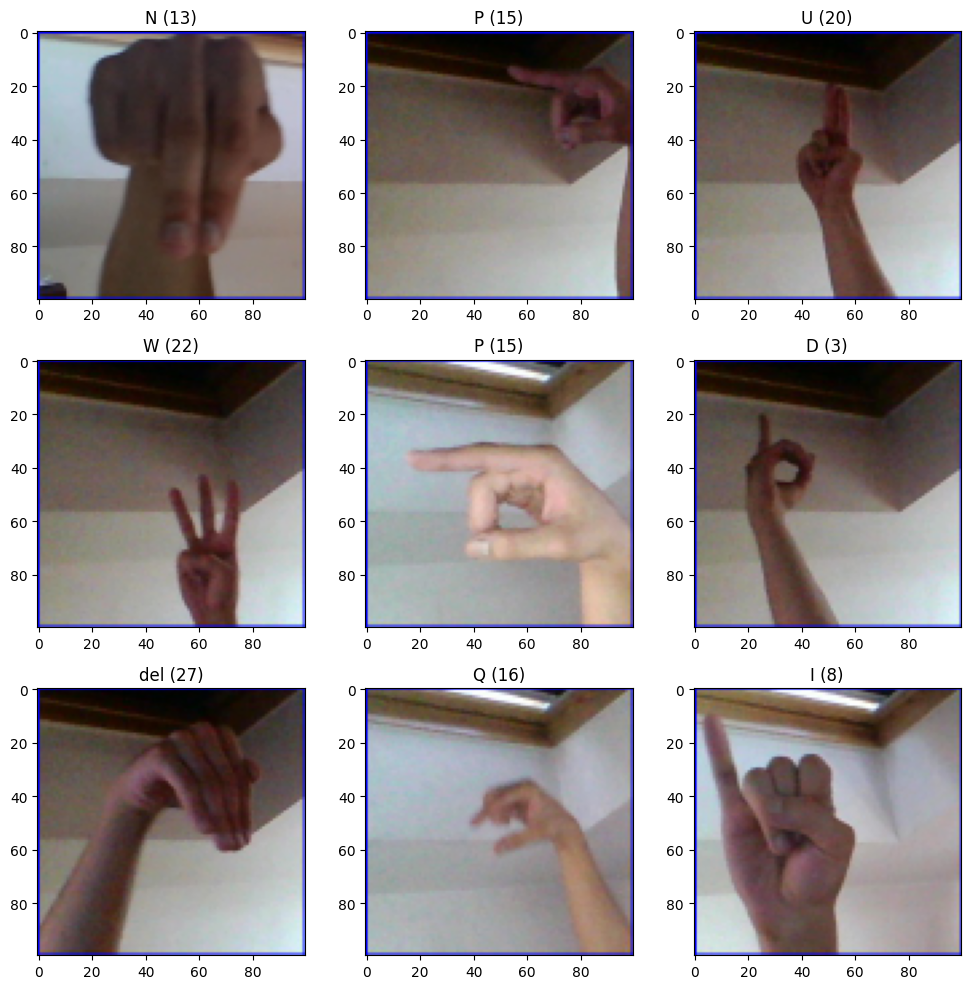

In [8]:
fig, axes = plt.subplots(3,3, figsize=(10,10))

for i in range(3):
  for j in range(3):
    random_number = python_random.randint(0,len(X_train) - 1)
    axes[i][j].imshow(X_train[random_number])
    axes[i][j].set_title([k for k, v in labels.items() if y_train[random_number] == v][0] + f" ({y_train[random_number]})")

fig.tight_layout()

Displaying useful information and checking for anomalies.

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train max: {X_train.max()}")
print(f"X_train min: {X_train.min()}")
print(f"X_test max: {X_test.max()}")
print(f"X_test min: {X_test.min()}")
print(f"y_train unique values: {list(np.unique(y_train))}")

X_train shape: (87000, 100, 100, 3)
y_train shape: (87000,)
X_test shape: (28, 100, 100, 3)
X_train max: 255
X_train min: 0
X_test max: 255
X_test min: 0
y_train unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


# Preprocessing

One-hot encoding the labels.

In [10]:
!pip install keras

In [11]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 29)

Splitting train set to train and validation sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=987)

# CNN

Importing the required libraries.

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import keras.backend as K
import pandas as pd
from keras.optimizers import Adam, SGD

## Model Building

In [14]:
model = Sequential([
  Conv2D(filters=8, kernel_size=(7,7), strides=1, padding = 'same', activation='relu', input_shape=X_train.shape[1:]),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),

  Conv2D(filters=16, kernel_size=(7,7), strides=1, padding = 'same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),

  Conv2D(filters=32, kernel_size=(7,7), strides=2, padding = 'same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),

  Conv2D(filters=64, kernel_size=(7,7), strides=2, padding = 'same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),

  Conv2D(filters=128, kernel_size=(7,7), strides=2, padding = 'same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),

  Conv2D(filters=256, kernel_size=(7,7), strides=2, padding = 'same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),

  Flatten(),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(29, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 8)       1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      6288      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 100, 100, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        25120     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 50, 50, 32)        0

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath="weights.model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
model.fit(X_train, y_train,validation_data = (X_valid, y_valid), batch_size=128, epochs=20, callbacks=callbacks_list)

Epoch 1/20
544/544 [==============================] - ETA: 0s - loss: 1.4684 - accuracy: 0.6415
Epoch 1: val_accuracy improved from -inf to 0.92052, saving model to weights.model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


544/544 [==============================] - 79s 120ms/step - loss: 1.4684 - accuracy: 0.6415 - val_loss: 0.2367 - val_accuracy: 0.9205
Epoch 2/20
544/544 [==============================] - ETA: 0s - loss: 0.1216 - accuracy: 0.9614
Epoch 2: val_accuracy improved from 0.92052 to 0.95057, saving model to weights.model.hdf5
544/544 [==============================] - 57s 104ms/step - loss: 0.1216 - accuracy: 0.9614 - val_loss: 0.1727 - val_accuracy: 0.9506
Epoch 3/20
544/544 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.9777
Epoch 3: val_accuracy improved from 0.95057 to 0.96529, saving model to weights.model.hdf5
544/544 [==============================] - 56s 102ms/step - loss: 0.0731 - accuracy: 0.9777 - val_loss: 0.1198 - val_accuracy: 0.9653
Epoch 4/20
544/544 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9863
Epoch 4: val_accuracy improved from 0.96529 to 0.97678, saving model to weights.model.hdf5
544/544 [============================

With this model, maximum `val_accuracy` is 0.99856.

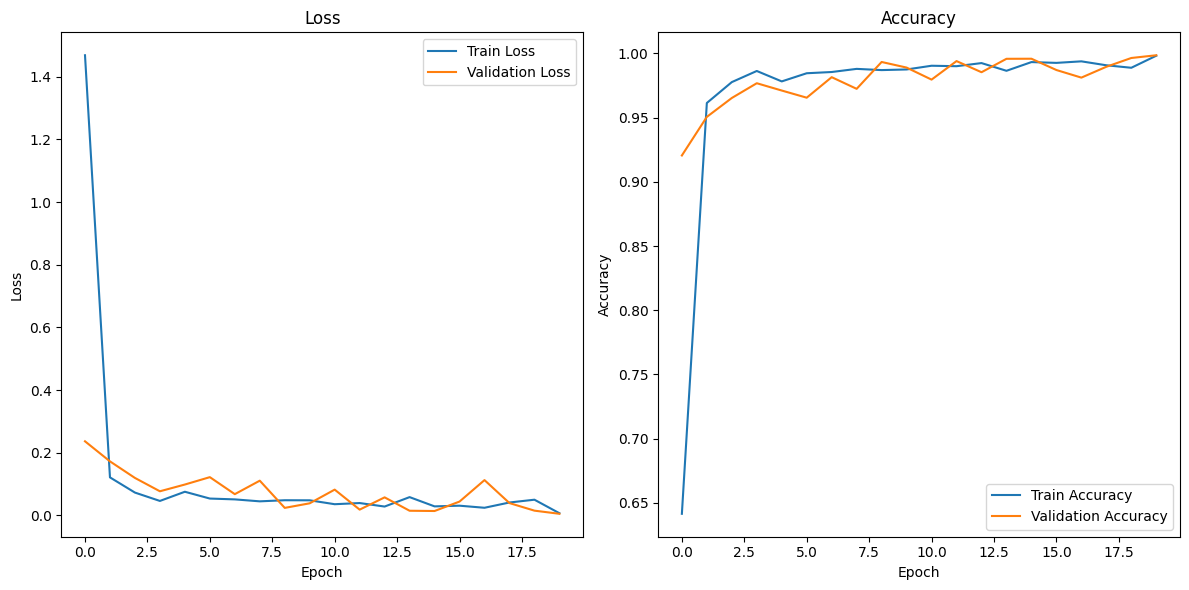

In [18]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the train and validation loss on the first axis
axs[0].plot(model.history.history['loss'], label='Train Loss')
axs[0].plot(model.history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend()

# Plot the train and validation accuracy on the second axis
axs[1].plot(model.history.history['accuracy'], label='Train Accuracy')
axs[1].plot(model.history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend()

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()

# Predictions with the best model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 8)       1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      6288      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 100, 100, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        25120     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 50, 50, 32)        0

Function to put predictions in a dataframe.

In [20]:
def get_preds_df(X_test, model_name):
  preds = pd.DataFrame(pd.DataFrame(data=(model_name.predict(X_test) > 0.5).astype("int32"), columns = list(labels.keys())).idxmax(1), columns=["Prediction"])
  preds.index.name = "Id"
  return preds

Predictions are made and some samples with their labels are displayed.

In [21]:
import pandas as pd

preds = get_preds_df(X_test, model)
preds.sample(5)

1/1 [==============================] - 1s 535ms/step


,Prediction
Id,
24,Y
5,F
7,H
8,I
25,Z


Plotting test set images with predicted labels.

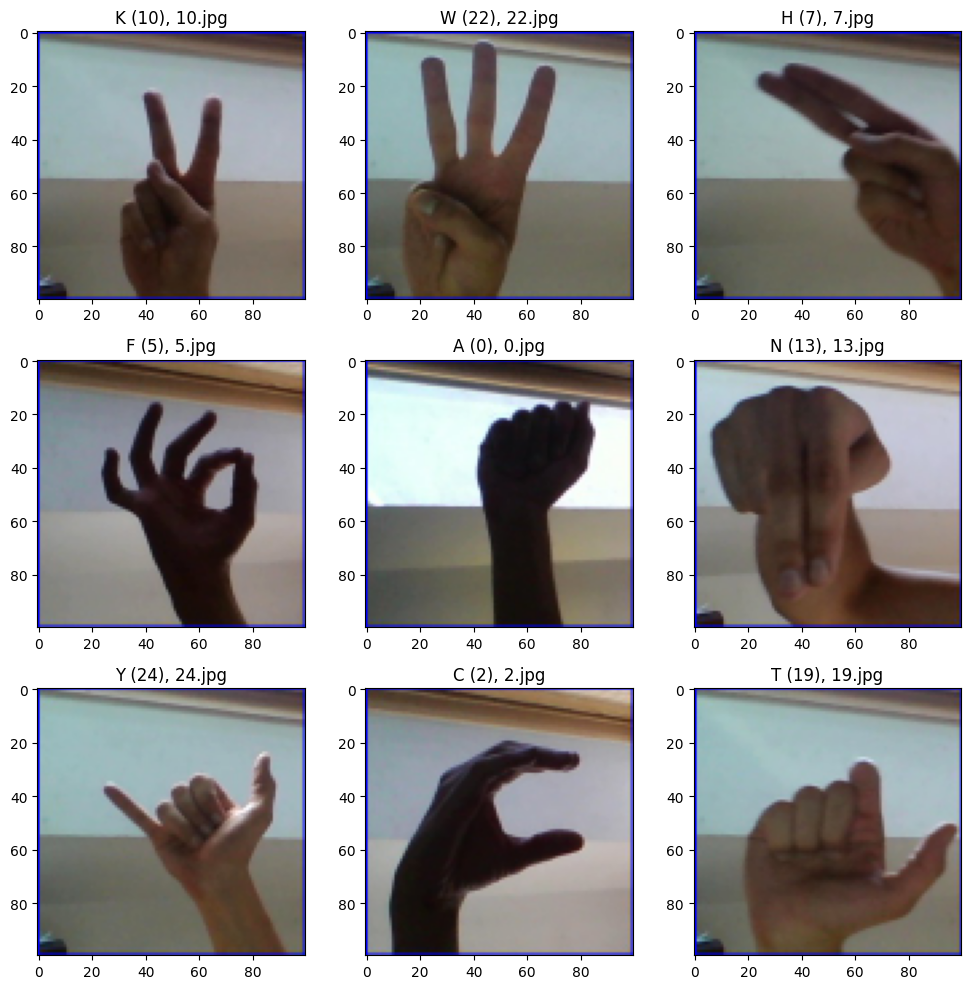

In [22]:
fig, axes = plt.subplots(3,3, figsize=(10,10))

for i in range(3):
  for j in range(3):
    random_number = python_random.randint(0,len(X_test) - 1)
    axes[i][j].imshow(X_test[random_number])
    axes[i][j].set_title(f"{preds.iloc[random_number][0]} ({labels[preds.iloc[random_number][0]]}), {random_number}.jpg")

fig.tight_layout()

# Exporting predictions as CSV

In [23]:
preds.to_csv("results.csv")

# For saving and loading models





In [24]:
model.save("/content/drive/My Drive/ASL_Project/model")